In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# Read in the generation-levels-detail dataset
generation_levels_detail_df = pd.read_csv("./resources/dfa/dfa-generation-levels-detail.csv")
generation_levels_detail_df.head()  


,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Miscellaneous assets,Liabilities,Loans (Liabilities),Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count
0,1989:Q3,Silent,17649120,5648793,4588120,1060674,12000326,2433812,309876,893002,...,139110,1267424,1257740,831951,308981,2354,114454,9684,16381696,48553376
1,1989:Q3,BabyBoom,5808847,3051118,2260930,790188,2757729,510502,52393,171564,...,85216,1831588,1825424,1355260,445761,2171,22233,6164,3977259,39289625
2,1989:Q3,GenX,131077,89437,44119,45318,41640,12634,374,4954,...,3023,53761,53633,23943,29466,7,217,128,77316,5177100
3,1989:Q3,Millennial,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1989:Q4,Silent,17908857,5722025,4654123,1067902,12186832,2443224,315117,901378,...,141439,1290657,1280630,847741,315406,2299,115185,10027,16618200,48581895


In [3]:
generation_levels_detail_df.dtypes

Date                                           object
Category                                       object
Assets                                          int64
Nonfinancial assets                             int64
Real estate                                     int64
Consumer durables                               int64
Financial assets                                int64
Deposits                                        int64
Money market fund shares                        int64
Debt securities                                 int64
U.S. government and municipal securities        int64
Corporate and foreign bonds                     int64
Loans (Assets)                                  int64
Other loans and advances (Assets)               int64
Mortgages                                       int64
Corporate equities and mutual fund shares       int64
Life insurance reserves                         int64
Annuities                                       int64
DC pension entitlements     

In [4]:
# Update dataframe to include Year column based on date, this will be used to sum by year vs quarter
# Convert the 'Date' column to datetime
generation_levels_detail_df['Date'] = pd.to_datetime(generation_levels_detail_df['Date'], format='%Y:Q%m')

# Extract the year and create a new column 'Year'
generation_levels_detail_df['Year'] = generation_levels_detail_df['Date'].dt.year


# Display the DataFrame
generation_levels_detail_df.head()

,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Liabilities,Loans (Liabilities),Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count,Year
0,1989-03-01,Silent,17649120,5648793,4588120,1060674,12000326,2433812,309876,893002,...,1267424,1257740,831951,308981,2354,114454,9684,16381696,48553376,1989
1,1989-03-01,BabyBoom,5808847,3051118,2260930,790188,2757729,510502,52393,171564,...,1831588,1825424,1355260,445761,2171,22233,6164,3977259,39289625,1989
2,1989-03-01,GenX,131077,89437,44119,45318,41640,12634,374,4954,...,53761,53633,23943,29466,7,217,128,77316,5177100,1989
3,1989-03-01,Millennial,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1989
4,1989-04-01,Silent,17908857,5722025,4654123,1067902,12186832,2443224,315117,901378,...,1290657,1280630,847741,315406,2299,115185,10027,16618200,48581895,1989


In [5]:
# add column to calculate the % Real applies to Assets & New Worth
generation_levels_detail_df['RE Pct of Assets'] = (generation_levels_detail_df['Real estate'] / generation_levels_detail_df['Assets']) * 100
generation_levels_detail_df['RE Pct of Assets'] = generation_levels_detail_df['RE Pct of Assets'].round(0).astype('Int64')

generation_levels_detail_df['RE Pct of Net Worth'] = (generation_levels_detail_df['Real estate'] / generation_levels_detail_df['Net worth']) * 100
generation_levels_detail_df['RE Pct of Net Worth'] = generation_levels_detail_df['RE Pct of Net Worth'].round(0).astype('Int64')

# Display the DataFrame
generation_levels_detail_df.head()


,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count,Year,RE Pct of Assets,RE Pct of Net Worth
0,1989-03-01,Silent,17649120,5648793,4588120,1060674,12000326,2433812,309876,893002,...,831951,308981,2354,114454,9684,16381696,48553376,1989,26,28
1,1989-03-01,BabyBoom,5808847,3051118,2260930,790188,2757729,510502,52393,171564,...,1355260,445761,2171,22233,6164,3977259,39289625,1989,39,57
2,1989-03-01,GenX,131077,89437,44119,45318,41640,12634,374,4954,...,23943,29466,7,217,128,77316,5177100,1989,34,57
3,1989-03-01,Millennial,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1989,<NA>,<NA>
4,1989-04-01,Silent,17908857,5722025,4654123,1067902,12186832,2443224,315117,901378,...,847741,315406,2299,115185,10027,16618200,48581895,1989,26,28


In [6]:

# Group by 'Year' and 'Category' and calculate the mean
gen_level_details_grouped = generation_levels_detail_df.groupby(['Year', 'Category']).mean()

# Reset the index to make 'Year' and 'Category' normal columns again
# gen_level_details_grouped.reset_index(inplace=True)

# Display the DataFrame
gen_level_details_grouped.head()

Date       Assets  Nonfinancial assets  \
Year Category                                                           
1989 BabyBoom   1989-03-16 12:00:00   5895161.50           3075637.00   
     GenX       1989-03-16 12:00:00    141229.00             93578.00   
     Millennial 1989-03-16 12:00:00         0.00                 0.00   
     Silent     1989-03-16 12:00:00  17778988.50           5685409.00   
1990 BabyBoom   1990-02-15 00:00:00   6135715.75           3194221.75   

                 Real estate  Consumer durables  Financial assets    Deposits  \
Year Category                                                                   
1989 BabyBoom     2276783.50          798853.50        2819524.50   525057.00   
     GenX           45838.00           47740.00          47651.00    15151.00   
     Millennial         0.00               0.00              0.00        0.00   
     Silent       4621121.50         1064288.00       12093579.00  2438518.00   
1990 BabyBoom     2356376.25          837845.75        2941493.75   569089.75   

                 Money market fund shares  Debt securities  \
Year Category                                                
1989 BabyBoom                    56883.50         172800.5   
     GenX                          560.00           5255.0   
     Millennial                      0.00              0.0   
     Silent                     312496.50         897190.0   
1990 BabyBoom                    80384.75         189985.0   

                 U.S. government and municipal securities  ...  \
Year Category                                              ...   
1989 BabyBoom                                   130894.50  ...   
     GenX                                         4864.50  ...   
     Millennial                                      0.00  ...   
     Silent                                     776727.50  ...   
1990 BabyBoom                                   148807.25  ...   

                 Loans (Liabilities)  Home mortgages  Consumer credit  \
Year Category                                                           
1989 BabyBoom             1847639.50      1371119.50        452685.00   
     GenX                   57021.00        24902.50         31868.00   
     Millennial                 0.00            0.00             0.00   
     Silent               1269185.00       839846.00        312193.50   
1990 BabyBoom             1958220.25      1477067.75        456980.25   

                 Depository institutions loans n.e.c.  \
Year Category                                           
1989 BabyBoom                                 2126.00   
     GenX                                        8.50   
     Millennial                                  0.00   
     Silent                                   2326.50   
1990 BabyBoom                                 1615.75   

                 Other loans and advances (Liabilities)  \
Year Category                                             
1989 BabyBoom                                  21709.50   
     GenX                                        242.00   
     Millennial                                    0.00   
     Silent                                   114819.50   
1990 BabyBoom                                  22556.25   

                 Deferred and unpaid life insurance premiums   Net worth  \
Year Category                                                              
1989 BabyBoom                                         6292.5   4041229.5   
     GenX                                              164.5     84043.5   
     Millennial                                          0.0         0.0   
     Silent                                           9855.5  16499948.0   
1990 BabyBoom                                         6285.5   4171210.0   

                 Household count  RE Pct of Assets  RE Pct of Net Worth  
Year Category                                                            
1989 BabyBoom         39302206.5              

In [8]:
# Filter the DataFrame down only to those columns to chart
gen_level_details_grouped = gen_level_details_grouped[["Net worth", "Assets", "Liabilities", "Real estate", "RE Pct of Assets", "RE Pct of Net Worth"]]   
# gen_level_details_grouped = gen_level_details_grouped[['Net worth', 'Assets', 'Liabilities', 'Real estate', 'RE Pct of Assets', 'RE Pct of Net Worth']]
gen_level_details_grouped.head(50)
# gen_level_details_grouped.loc[1990]




Net worth       Assets  Liabilities  Real estate  \
Year Category                                                         
1989 BabyBoom     4041229.50   5895161.50   1853932.00   2276783.50   
     GenX           84043.50    141229.00     57185.50     45838.00   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      16499948.00  17778988.50   1279040.50   4621121.50   
1990 BabyBoom     4171210.00   6135715.75   1964505.75   2356376.25   
     GenX          112092.25    194122.00     82030.00     59809.00   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      16850973.50  18188977.25   1338003.25   4685632.00   
1991 BabyBoom     4649668.00   6732969.50   2083301.50   2461827.25   
     GenX          182954.50    300163.25    117209.00     90364.25   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      17496991.50  18873072.75   1376081.50   4685606.00   
1992 BabyBoom     5211829.00   7367390.00   2155561.00   2644207.75   
     GenX          234039.00    411064.00    177025.00    133268.00   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      17968259.50  19397990.75   1429731.00   4737222.50   
1993 BabyBoom     6127239.75   8429900.25   2302660.50   2895097.25   
     GenX          325200.50    582640.25    257439.75    177134.00   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      18485440.00  19902397.00   1416957.25   4766007.75   
1994 BabyBoom     6781565.00   9288105.75   2506540.75   3186329.25   
     GenX          358330.00    725709.00    367378.75    230851.50   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      18925431.00  20325459.25   1400028.50   4814887.00   
1995 BabyBoom     7834984.50  10544773.50   2709789.25   3464757.25   
     GenX          517098.75   1015913.25    498815.00    354154.75   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      19397640.75  20792705.25   1395064.25   4637562.00   
1996 BabyBoom     8963166.25  11862014.50   2898848.25   3643011.00   
     GenX          671400.50   1298049.25    626649.00    432467.50   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      20140034.75  21577333.25   1437298.50   4671688.25   
1997 BabyBoom    10341380.50  13379504.75   3038124.50   3828921.50   
     GenX          977214.50   1735275.75    758061.25    535883.75   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      21025220.00  22522733.75   1497513.25   4785786.50   
1998 BabyBoom    12272844.75  15468744.00   3195899.00   4194500.75   
     GenX         1385198.75   2305681.00    920482.25    700624.25   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      22172237.25  23735913.75   1563676.50   4954820.50   
1999 BabyBoom    14278230.25  17782396.00   3504165.75   4686868.50   
     GenX         1907003.75   3024600.50   1117596.25    947012.00   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      22707235.75  24275993.50   1568757.75   5166618.25   
2000 BabyBoom    16626001.25  20426446.75   3800445.25   5445643.25   
     GenX         2410255.00   3795960.00   1385704.75   1245322.75   
     Millennial         0.00         0.00         0.00         0.00   
     Silent      23226922.25  24800596.50   1573674.50   5535438.25   
2001 BabyBoom    17585280.75  21695719.50   4110439.25   6470680.00   
     GenX         2327170.00   3990322.00   1663152.00   1577390.00   

                 RE Pct of Assets  RE Pct of Net Worth  
Year Category                                           
1989 BabyBoom                38.5                 56.5  
     GenX                    32.5                 54.5  
     Millennial              <NA>                 <NA>  
     Silent                  26.0        

In [17]:
# Python
selected_rows = gen_level_details_grouped.loc[[(1999, 'BabyBoom'), (2007, 'GenX'), (2023, 'Millennial')]]
selected_rows


,,Net worth,Assets,Liabilities,Real estate,RE Pct of Assets,RE Pct of Net Worth
Year,Category,,,,,,
1999,BabyBoom,14278230.25,17782396.00,3504165.75,4686868.50,26.25,32.75
2007,GenX,6116921.50,10845477.50,4728556.00,4898063.25,45.0,80.0
2023,Millennial,12830810.25,19671780.75,6840971.00,7839975.25,40.0,61.0


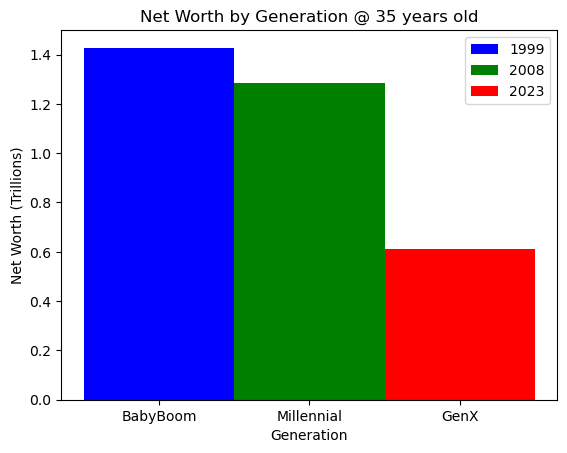

In [43]:
# Python
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Select the required rows
selected_rows = gen_level_details_grouped.loc[[(1999, 'BabyBoom'), (2007, 'GenX'), (2023, 'Millennial')]]

# Reset index to use 'Category' as x-axis
selected_rows_reset = selected_rows.reset_index()

# Sort DataFrame by 'Net worth'
selected_rows_reset = selected_rows_reset.sort_values('Net worth', ascending=False)

# Create the bar chart with specified colors and labels
colors = ['blue', 'green', 'red']  # Specify your colors here
labels = ['1999', '2008', '2023']  # Specify your labels here
bars = plt.bar(selected_rows_reset['Category'], selected_rows_reset['Net worth'], color=colors, width=1.0)

# Add labels to the bars for the legend
for i in range(len(bars)):
    bars[i].set_label(labels[i])

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Net Worth (Trillions)')

# Change y-tick values to represent trillions
formatter = ticker.FuncFormatter(lambda x, pos: '{:0.1f}'.format(x/10000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Net Worth by Generation @ 35 years old')

# Add legend
plt.legend()

# Display the plot
plt.show()

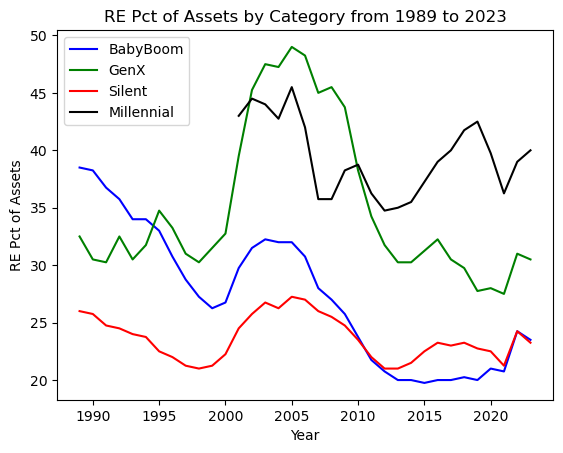

In [56]:
# Python
import matplotlib.pyplot as plt

# Filter the data to include only the years from 1989 to 2023
filtered_data = gen_level_details_grouped.loc[(gen_level_details_grouped.index.get_level_values('Year') >= 1989) & 
                                              (gen_level_details_grouped.index.get_level_values('Year') <= 2023)]

# Remove rows with missing values
filtered_data = filtered_data.dropna(subset=['RE Pct of Assets'])

# Reset index to use 'Year' as x-axis
filtered_data_reset = filtered_data.reset_index()

# Create a line chart for each category with customized line style
categories = filtered_data_reset['Category'].unique()
linestyles = ['-', '-', '-', '-']  # Specify your line styles here
marker = ['o', 'o', 'o', 'o']  # Specify your markers here
colors = ['blue', 'green', 'red', 'black']  # Specify your colors here
for i, category in enumerate(categories):
    category_data = filtered_data_reset[filtered_data_reset['Category'] == category]
    plt.plot(category_data['Year'], category_data['RE Pct of Assets'], label=category, linestyle=linestyles[i], color=colors[i])

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('RE Pct of Assets')
plt.title('RE Pct of Assets by Category from 1989 to 2023')
plt.legend()

# Display the plot
plt.show()

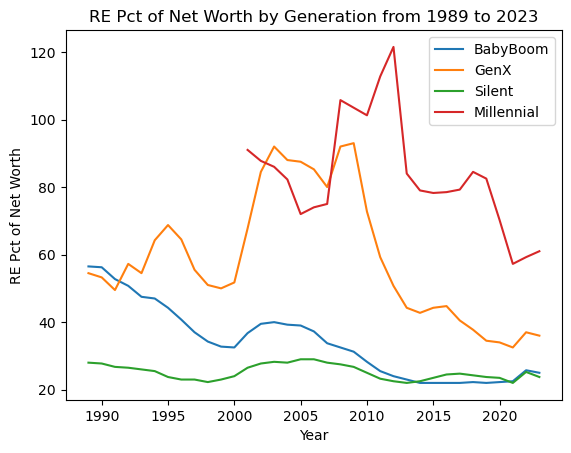

In [47]:
# Create line chart to show trend of pct of net worth in real estate by generation

# Python
import matplotlib.pyplot as plt

# Filter the data to include only the years from 1989 to 2023
filtered_data = gen_level_details_grouped.loc[(gen_level_details_grouped.index.get_level_values('Year') >= 1989) & 
                                              (gen_level_details_grouped.index.get_level_values('Year') <= 2023)]

# Remove rows with missing values
filtered_data = filtered_data.dropna(subset=['RE Pct of Net Worth'])

# Reset index to use 'Year' as x-axis
filtered_data_reset = filtered_data.reset_index()

# Create a line chart for each category
categories = filtered_data_reset['Category'].unique()
for category in categories:
    category_data = filtered_data_reset[filtered_data_reset['Category'] == category]
    plt.plot(category_data['Year'], category_data['RE Pct of Net Worth'], label=category)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('RE Pct of Net Worth')
plt.title('RE Pct of Net Worth by Generation from 1989 to 2023')
plt.legend()

# Display the plot
plt.show()